In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
from PIL import Image
%matplotlib inline

ModuleNotFoundError: No module named 'cv2'

In [3]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [4]:
mask = cv2.imread('data/stage1_train_/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masksmask.png', 0)
image = cv2.imread('data/stage1_train_/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png', 0)

In [54]:
imgs = os.listdir('data/stage1_test/')

In [76]:
def split_mask(step, image, save_folder):
    # path = "data/stage1_train_/{}/masksmask.png".format(image)
    path = "data/stage1_test/{}/images/{}.png".format(image, image)
    mask = cv2.imread(path)
    print(mask.shape)
    height, width, _ =  mask.shape
    matrices = []
    cnt_h = 0
    cnt_w = 0
    while (height > 0):
        if height > step:
            step_h = step
            b = (cnt_h+1)*step_h
            a = cnt_h*step_h
        else:
            step_h = step
            b = mask.shape[0]
            a = mask.shape[0]-step_h
#             print(a,b)
        width = mask.shape[1]
        cnt_w = 0
#         print(width)
        while (width > 0):
            zeros = np.zeros((step, step))
            if width > step:
                step_w = step
                zeros = mask[a:b, cnt_w*step_w:(cnt_w+1)*step_w]
#                 print(cnt_w*step_w, (cnt_w+1)*step_w)
#                 print(a, b)
            else:
                step_w = step
#                 print(step_w)
                zeros = mask[a:b, (mask.shape[1] - step_w):mask.shape[1]]
#                 print((mask.shape[1] - width), mask.shape[1])
#                 print(a, b)
            cnt_w += 1
#             print(cnt_w)
            matrices.append(zeros)
            cv2.imwrite('{}/{}_{}_{}.png'.format(save_folder, image, cnt_h, cnt_w), zeros)
            width = width - step_w
        cnt_h +=1
#         print('1')
        height = height - step_h
    print(len(matrices))
    # return matrices

In [77]:
m = split_mask(128, imgs[1], 'data/cropped_test/')

(390, 239, 3)
8


In [78]:
[split_mask(128, img, 'data/cropped_test/') for img in imgs]

(256, 256, 3)
4
(390, 239, 3)
8
(256, 256, 3)
4
(256, 256, 3)
4
(256, 256, 3)
4
(256, 256, 3)
4
(512, 640, 3)
20
(256, 256, 3)
4
(519, 253, 3)
10
(520, 696, 3)
30
(512, 680, 3)
24
(256, 256, 3)
4
(256, 256, 3)
4
(256, 256, 3)
4
(512, 680, 3)
24
(256, 256, 3)
4
(256, 256, 3)
4
(520, 348, 3)
15
(512, 640, 3)
20
(256, 256, 3)
4
(512, 680, 3)
24
(512, 640, 3)
20
(512, 640, 3)
20
(519, 253, 3)
10
(524, 348, 3)
15
(512, 680, 3)
24
(519, 253, 3)
10
(260, 347, 3)
9
(512, 640, 3)
20
(256, 256, 3)
4
(512, 640, 3)
20
(512, 680, 3)
24
(256, 256, 3)
4
(520, 696, 3)
30
(520, 348, 3)
15
(524, 348, 3)
15
(520, 696, 3)
30
(256, 256, 3)
4
(519, 161, 3)
10
(524, 348, 3)
15
(256, 256, 3)
4
(512, 680, 3)
24
(519, 162, 3)
10
(524, 348, 3)
15
(256, 256, 3)
4
(256, 256, 3)
4
(260, 347, 3)
9
(256, 256, 3)
4
(512, 640, 3)
20
(256, 256, 3)
4
(256, 256, 3)
4
(512, 680, 3)
24
(519, 253, 3)
10
(520, 348, 3)
15
(519, 162, 3)
10
(260, 347, 3)
9
(260, 347, 3)
9
(519, 161, 3)
10
(256, 256, 3)
4
(256, 256, 3)
4
(520, 69

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [83]:
out = os.listdir('output/mask')

In [139]:
np_out = np.array([i.split('_', 3) for i in outs])
np_out[(np_out[:, 0] == 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8') & (np_out[:, -1] == '0')]

array([['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '0', '1', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '2', '1', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '1', '3', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '0', '2', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '1', '1', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '0', '3', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '2', '2', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '1', '2', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '2', '3', '0']],
      dtype='<U64')

In [104]:
outs = [i.split('.', 1)[0] for i in out]
outs_ = [i.split('_', 3)[0] for i in outs]
indxs = [i for i, j in enumerate(outs_) if j == 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8']

In [107]:
indxs = [i for i, j in enumerate(outs_) if j == 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8']

In [113]:
lol = [outs[i] for i in indxs]

In [115]:
xc = [i.split('_', 3)[-1] for i in lol]

In [119]:
zero_st = [i for i, j in enumerate(xc) if j == '0']

In [123]:
stuff = [lol[i] for i in zero_st]

In [124]:
sorted(stuff)

['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_0_1_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_0_2_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_0_3_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_1_1_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_1_2_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_1_3_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_2_1_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_2_2_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_2_3_0']

In [210]:
def get_sorted_names(name, file_list, ch):
    outs = [i.split('.', 1)[0] for i in out]
    np_out = np.array([i.split('_', 3) for i in outs])
    zero_st = [(np_out[:, 0] == name) & (np_out[:, -1] == ch)]
    stuff = np.array(file_list)[zero_st]
    return sorted(stuff)

In [214]:
def join_mask(step, image, crop_folder, save_folder, ch):
    # path = "data/stage1_train_/{}/masksmask.png".format(image)
    out = os.listdir(crop_folder)
    path = "data/stage1_test/{}/images/{}.png".format(image, image)
    crops = get_sorted_names(image, out, ch)
    mask = cv2.imread(path)
    height, width, _ =  mask.shape
    matrices = []
    zeros = np.zeros((height, width))
    cnt = 0
    cnt_h = 0
    cnt_w = 0
    while (height > 0):
        if height > step:
            step_h = step
            b = (cnt_h+1)*step_h
            a = cnt_h*step_h
        else:
            step_h = step
            b = mask.shape[0]
            a = mask.shape[0]-step_h
        width = mask.shape[1]
        cnt_w = 0
        while (width > 0):
            
            if width > step:
                step_w = step
                read_path = os.path.join(crop_folder, crops[cnt])
                zeros[a:b,cnt_w*step_w:(cnt_w+1)*step_w] = cv2.imread(read_path, 0)
                
            else:
                step_w = step
                read_path = os.path.join(crop_folder, crops[cnt])
                zeros[a:b,(mask.shape[1] - step_w):mask.shape[1]] = cv2.imread(read_path, 0)
            cnt_w += 1
            cnt += 1
            matrices.append(zeros)
            
            width = width - step_w
        cnt_h +=1
        height = height - step_h
    cv2.imwrite('{}/{}_{}.png'.format(save_folder, image, ch), zeros)

In [215]:
join_mask(128, 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
          'output/mask/', 'output/joined_mask/', '0')

In [216]:
[join_mask(128, img, 'output/mask/', 'output/joined_mask/', '0') for img in imgs]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

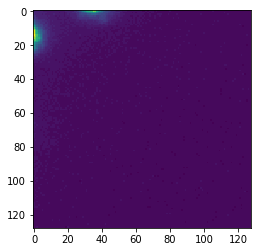

In [40]:
plt.imshow(mat[0])

In [26]:
crop('data/cropped_test',
     'data/stage1_test/0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5/images/0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5.png',
     128, 128)

1
ex
ex
ex
ex


In [13]:
res = cv2.resize(image, (128, 128), cv2.INTER_CUBIC)

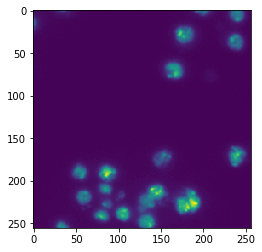

In [14]:
plt.imshow(image)

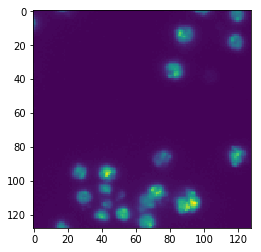

In [15]:
plt.imshow(res)

In [3]:
mask.shape

(256, 256)

In [28]:
test = np.zeros([4,3,128,128])
test[:,0,:,:].shape

(4, 128, 128)

In [6]:
mask1.shape

(3, 256, 256)

In [5]:
mask1 = np.zeros((3, *mask.shape))

In [23]:
#mask1 = np.zeros(3, (*mask.shape))
kernel = np.ones((4, 4), np.uint8)
seed = cv2.erode(mask[:,:,0], kernel, iterations=1)
border = mask[:,:,0] - seed
mask[:,:,1] = np.zeros(seed.shape)
mask[:,:,1] = seed
mask[:,:,2] = np.zeros(seed.shape)
mask[:,:,2] = border

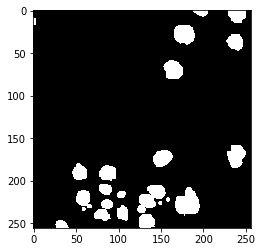

In [26]:
plt.imshow(mask[:,:,0], 'gray')

In [63]:
train_path = 'data/stage1_train/'

In [30]:
masks_path = 'data/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks'

In [87]:
files = os.listdir(train_path)
kernel = np.ones((3,3),np.uint8)
for i in tqdm(range(len(files))):
    masks = os.path.join(files[i], 'masks')
    img_path = os.path.join(train_path, masks)
    mask = unite(img_path)
    seed = cv2.erode(mask, kernel,iterations = 1)
    border = mask - seed
    cv2.imwrite(img_path + 'mask.png', mask)
    cv2.imwrite(img_path + 'seed.png', seed)
    cv2.imwrite(img_path + 'border.png', border)


100%|██████████| 664/664 [00:43<00:00, 15.20it/s]


In [86]:
def unite(masks_path):
    one_true = None
    for image in os.listdir(masks_path):
        img_path = os.path.join(masks_path, image)
        img_mask = cv2.imread(img_path)
        if not hasattr(one_true, 'shape'):
            one_true = img_mask
            # print(img_path)
        else:
            one_true = one_true + img_mask
    return one_true

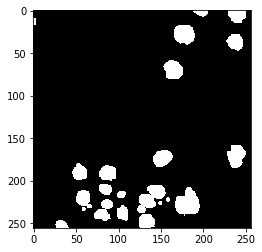

In [62]:
plt.imshow(one_true)

In [50]:
img = cv2.imread('data/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png')

In [51]:
img.shape

(256, 256, 3)

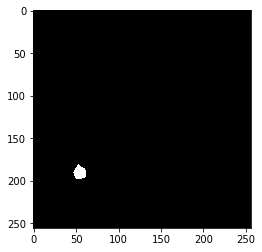

In [52]:
kernel = np.ones((3,3),np.uint8)
eroison = cv2.erode(img, kernel,iterations = 1)
border = img - eroison
plt.imshow(eroison)

(256, 256, 3)


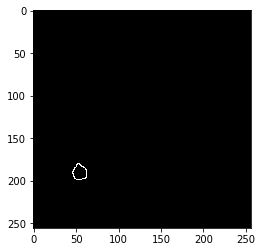

In [54]:
plt.imshow(border)
print(border.shape)

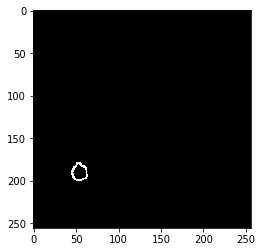

In [14]:
kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient)

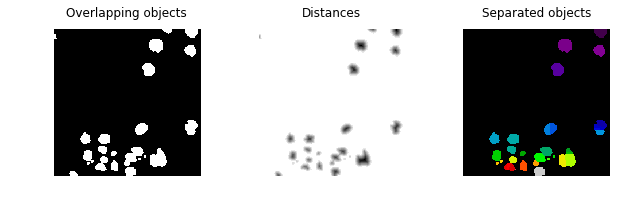

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
image = mask
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

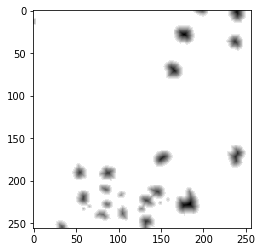

In [21]:
plt.imshow(-distance, 'gray')

In [27]:
labels.shape

(256, 256)